# Exercice 2: Miles Per Gallon

# importer les librairies necessaire

In [18]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats import ttest_ind,pearsonr, chisquare,f_oneway,chi2_contingency

print("pandas version:" ,pd.__version__)
print("matplotlib version:" ,matplotlib.__version__)
print("seaborn version:" ,sns.__version__)
print("scipy versiion:" , scipy.__version__)

pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2
scipy versiion: 1.15.2


### TOUR D'HORIZON DU DATASET


### importation du dataset

In [19]:

df_0= sns.load_dataset("mpg")

#suprimer les lignes avec  valeur non
df_0.dropna(inplace=True)
df=df_0.copy()

#liste des columns du dataset dans une liste
columns= df.columns.tolist()
df.head()




,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


1. Analysez l'évolution de la consommation des voitures (mpg) par rapport à la puissance du moteur (horsepower).

- Refaites le graphique correspondant

<Axes: xlabel='horsepower', ylabel='mpg'>

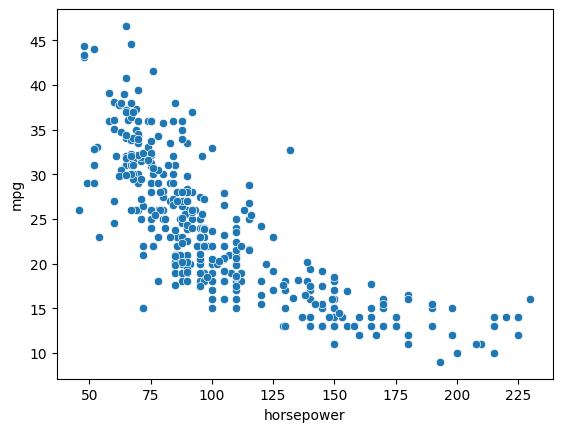

In [20]:
sns.scatterplot(data=df, x="horsepower",y="mpg")


- Quelle est la corrélation de Pearson entre ces deux variables ?


In [21]:
result_pearsonr=pearsonr(y=df["mpg"],x=df["horsepower"])
print(result_pearsonr)
print("la correlation de pearson entre le consommation de voiture (mpg) et \nla puissance du moteur(horsepower) est : ",result_pearsonr.statistic)


PearsonRResult(statistic=np.float64(-0.7784267838977759), pvalue=np.float64(7.0319890294050415e-81))
la correlation de pearson entre le consommation de voiture (mpg) et 
la puissance du moteur(horsepower) est :  -0.7784267838977759



- Quelle serait la probabilité d'obtenir une telle corrélation ou plus extrême, si en réalité les deux variables étaient totalement décorrélées ?



In [22]:
print(f"H0: \"les deux variables ne sont pas corrélées\"")

alpha = 0.02
p_value= result_pearsonr.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")   


H0: "les deux variables ne sont pas corrélées"
nous avons suffisament d'evidences pour rejeter H0 
NB: la p_value est 7.0319890294050415e-81


### 2. Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?

In [23]:
## correction de guillaume: tout d'abord faire une boxeplot pour visualiser  les deux parties

df_temp=df.query(" `model_year`<=80 ").copy()
df_temp["half"]=df_temp["model_year"].apply(lambda x : x < 75).replace({True:"first",False:"second"})
df_temp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,half
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,first
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,first
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,first
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,first
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,first


<Axes: xlabel='half', ylabel='mpg'>

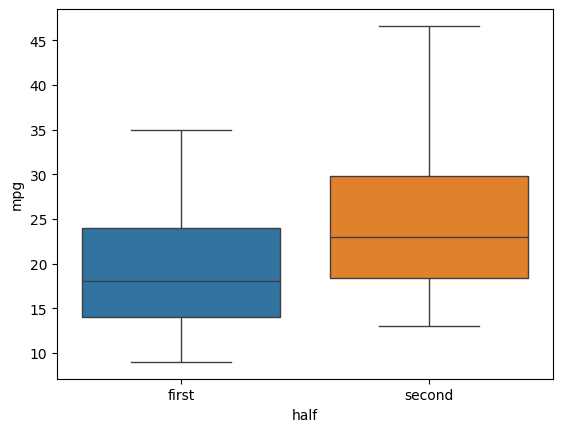

In [24]:
sns.boxplot(data=df_temp,x="half",y="mpg",hue="half")

In [25]:
#data frame contenant les data entre 1970 et 1975
df_70s1=df.query(" `model_year`>=70 & `model_year`<= 75")
#data frame contenant les data entre 1976 et 1980
df_70s2=df.query(" `model_year`>75 & `model_year`<= 80")

""" diff= df_70s2["mpg"] - df_70s1["mpg"]   #5.076207729468599 """

' diff= df_70s2["mpg"] - df_70s1["mpg"]   #5.076207729468599 '

### Test de Student 2 echantillons indépendants


- H0: "mpg moyen Groupe A == mpg moyen Groupe B"
    - Groupe A : Tous les modeles de 70-74
    - Groupe B : Tous les modeles de 75-80 

In [26]:
first_half=df_temp.query("`half`== 'first' ")
second_half=df_temp.query("`half`== 'second' ")

In [27]:
#test de student a deux echantillions (en supposons les var ,plus ou moins similaires)
ttest_ind(first_half["mpg"],second_half["mpg"],equal_var=True)

TtestResult(statistic=np.float64(-6.912631779958917), pvalue=np.float64(2.4451466260288248e-11), df=np.float64(332.0))

In [28]:
# test de welsh's
ttest_ind(first_half["mpg"],second_half["mpg"],equal_var=False)

TtestResult(statistic=np.float64(-7.075000003257606), pvalue=np.float64(8.923594936299578e-12), df=np.float64(331.77103612309065))

3. Un constructeur automobile américain affirme que les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).


In [29]:
df.query("`origin`=='usa'")["cylinders"].unique()

array([8, 6, 4])

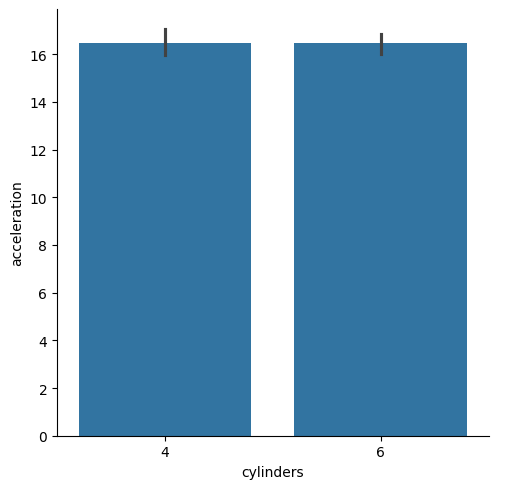

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
4,69.0,16.465217,2.180989,11.6,14.9,16.2,17.7,22.2
6,73.0,16.467123,1.908974,11.3,15.5,16.4,17.7,21.0


In [30]:
#data frame contenant que les USA avec les voiture a 4 ou 6 cylinders
USA_46=df.query("`origin`=='usa' & `cylinders` in [4,6]")
sns.catplot(data=USA_46,x="cylinders",y="acceleration",kind='bar')
plt.show()

USA_46.groupby("cylinders")["acceleration"].describe()

In [31]:

""" on utilisera le test de student a deux echantillons """
result_test= ttest_ind(*USA_46.groupby("cylinders")["acceleration"].apply(list))
#hypothe H0
print(f"H0: \"les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindre\"")

#niveau de confiance
alpha = 0.02
p_value= result_test.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")   


H0: "les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindre"
nous n'avons pas suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.995580442655906


4. Un collectionneur de voitures vous affirme que parmi les voitures Ford des années 1970-1982, il y avait :

- 25 % de 4 cylindres

- 25 % de 6 cylindres

- 50 % de 8 cylindres

Testez son affirmation et concluez avec un niveau de confiance de 95 %.



In [32]:
#data frame contenant que les voitureS de la marque ford
df_ford = df[df['name'].str.contains('ford', case=False, na=False)]

# NB: on a que 4,6 et 8 cylinders au niveau de ford , run this to see : df_ford['cylinders'].unique() 

#frequence attendu
expected_frequencies= (np.array([0.25,0.25,0.5])*len(df_ford))
#la frequence réelle qui sort du dataset
observed_frequencies=df_ford["cylinders"].value_counts().sort_index()
#application d test de ch2 (verifier si la frequence de plusieurs variable discrete est celle attendu)
ch2_test=chisquare(f_obs=observed_frequencies,f_exp=expected_frequencies)

## En Résumé : 

In [33]:
#hypothe H0
print(f"H0: \"Les voitures de la marque Ford ont le nombre de cylindre reparti comme suite : 25% pour 4 ,25% pour 6 et 50% pour 8\"")

#niveau de confiance
alpha = 0.05

p_value= ch2_test.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(6)}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(6)}")   


H0: "Les voitures de la marque Ford ont le nombre de cylindre reparti comme suite : 25% pour 4 ,25% pour 6 et 50% pour 8"
nous n'avons pas suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.367879


5. Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



Pour repondre a cette question je vais utiliser le test de ANOVA qui permet de voir si en moyenne
plusieurs variables discrete ont une meme moyenne dans une variable continue (jours de semaine et pourboire),on aurai pu utiliser  teste de student a 2 echantillons  

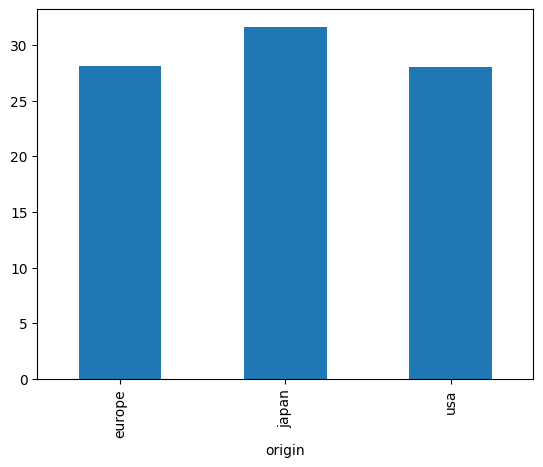

In [34]:
df_4c=df.query("`cylinders`== 4").groupby("origin")["mpg"].mean().plot(kind='bar')

In [35]:
df_4c=df.query("`cylinders`== 4")
liste_origin=df_4c.groupby("origin")["mpg"].apply(list)

## En Résumé : 

In [36]:

#hypothe H0
print(f"H0: \"Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982\"")
p_value= result_test.pvalue 
anova_result=f_oneway(*liste_origin)
#niveau de confiance
alpha = 0.02
p_value= anova_result.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")   


H0: "Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982"
nous avons suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.00011134953247210174


### 6. Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



<Axes: xlabel='origin'>

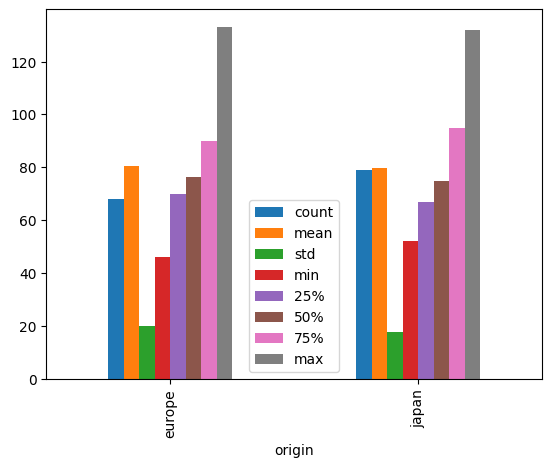

In [37]:
df.query("`origin`!= 'usa'").groupby("origin")["horsepower"].describe().plot(kind="bar")

etant specifique ,je vais utiliser le test de student a 2 echantillon

In [38]:
#data frame sans usa 
df_ej=df.query("`origin`!= 'usa'")
#creation d'une liste pour chaque pays moontrant le nombre de cheval
liste_origin1=df_ej.groupby("origin")["horsepower"].apply(list)
liste_origin1

origin
europe    [46.0, 87.0, 90.0, 95.0, 113.0, 90.0, 70.0, 76...
japan     [95.0, 88.0, 88.0, 95.0, 65.0, 69.0, 95.0, 97....
Name: horsepower, dtype: object

## En Résumé : 

In [39]:

#hypothe H0
print(f"H0: \"Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation\"")
p_value= result_test.pvalue 
Student2_result=ttest_ind(*liste_origin1)
#niveau de confiance
alpha = 0.02
p_value= Student2_result.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")   


H0: "Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation"
nous n'avons pas suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.8176893173506833


### 7. Un spécialiste vous dit que les constructeurs Ford et Dodge produisaient dans les années 70-82 des voitures avec un nombre de cylindres équivalent. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

Pour cette question aidez-vous du code suivant:
- `filtered_df = df[df['name'].str.contains('ford|dodge', case=False, na=False)]`
- `filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')

In [40]:
errors='ignore'
filtered_df = df[df['name'].str.contains('ford|dodge', case=False, na=False)]
filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')


C:\Users\franc\AppData\Local\Temp\ipykernel_16868\1967528723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')


In [41]:
pd.crosstab(filtered_df["brand"],filtered_df["cylinders"])

cylinders,4,6,8
brand,,,
dodge,12,4,12
ford,16,12,20


In [42]:

#hypothe H0
print(f"H0: \"Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation\"")
p_value= result_test.pvalue 
ch2c_result=chi2_contingency(pd.crosstab(filtered_df["brand"],filtered_df["cylinders"]))
#niveau de confiance
alpha = 0.02
p_value= ch2c_result.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value}")   


H0: "Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation"
nous n'avons pas suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.49519377793169383
